# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("creditcard.csv")

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Не очевидно, надо ли оставлять время от момента первой транзакции, проверим, отличается ли оно у групп

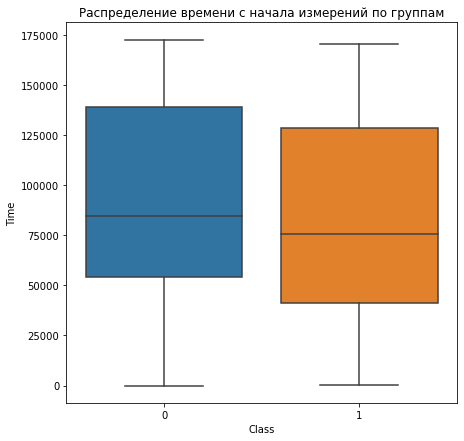

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.boxplot(x="Class", y="Time", data=data)
plt.title("Распределение времени с начала измерений по группам")
plt.show()

Из боксплотов кажется, что время отличается слабо, не предполагая нормальность его распределения проверим отличия, применив критерий Манна-Уитни

In [13]:
from scipy.stats import mannwhitneyu
time_0 = data.loc[data.Class == 0, "Time"]
time_1 = data.loc[data.Class == 1, "Time"]
u, p = mannwhitneyu(time_0, time_1)
print(u, p)

58572378.0 2.1930795812041207e-10


Время все-таки отличается, пока оставляем

Посмотрим на распределение признаков  

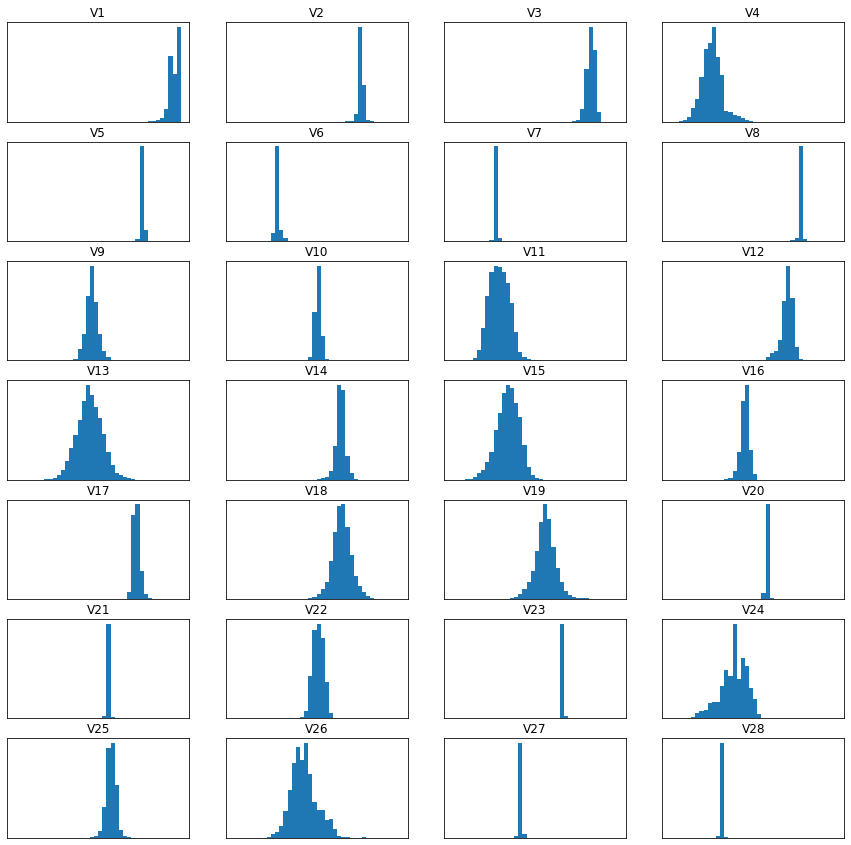

In [36]:
fig, axs = plt.subplots(7, 4, figsize=(15, 15))
columns = np.arange(1, 29)
for ax, col in zip(axs.flatten(), columns):
    col = f"V{col}"
    ax.hist(data[col], bins = 40)
    ax.set_title(col)
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.show()

Видно, что распределение многих признаков не похоже на нормальное, использовать логарифмирование не получиться в связи с наличием отрицательных значений. Попробуем использовать экспоненту.

In [121]:
data_modified = pd.DataFrame(data, copy=True)
columns = [1, 2, 3, 5, 6, 7, 8, 10, 14, 16, 17, 20, 21, 23, 27, 28]
for col in columns:
    col = f"V{col}"
    data_modified.loc[:, col] = np.exp(data_modified[col])

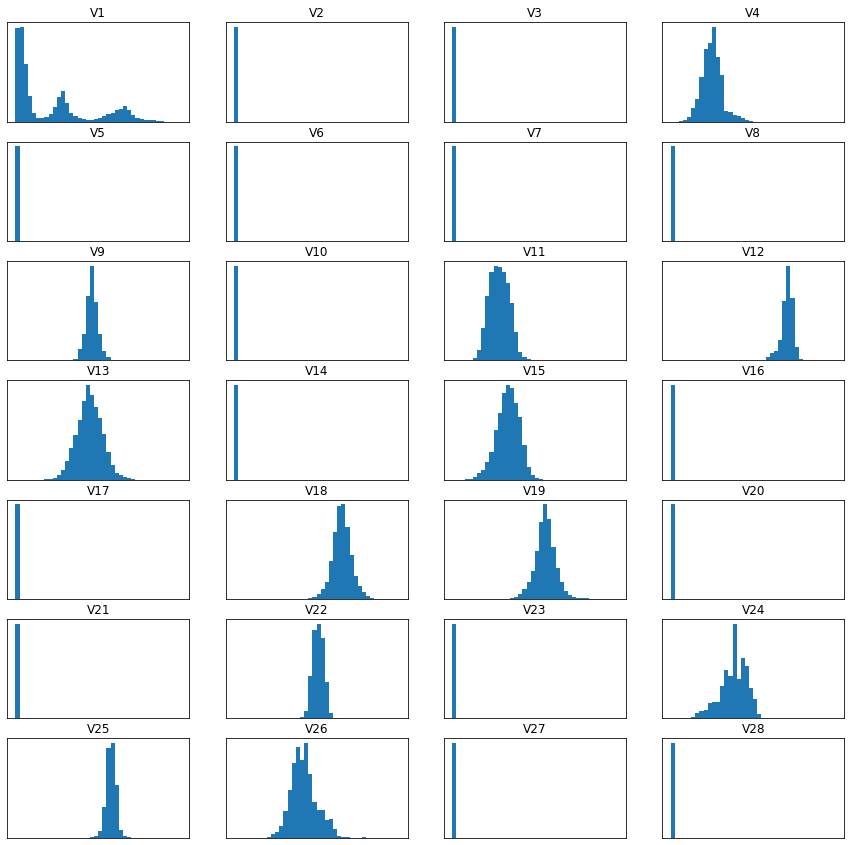

In [122]:
fig, axs = plt.subplots(7, 4, figsize=(15, 15))
columns = np.arange(1, 29)
for ax, col in zip(axs.flatten(), columns):
    col = f"V{col}"
    ax.hist(data_modified[col], bins = 40)
    ax.set_title(col)
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.show()

Стало хуже, не будем использовать экспоненту.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [70]:
X = data.drop(columns=["Class"])
Y = data["Class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

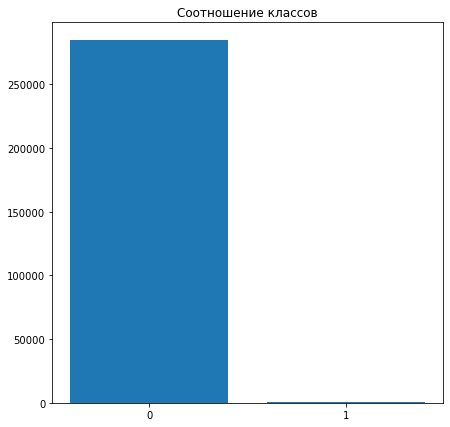

In [71]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.bar(("0", "1"), data["Class"].value_counts())
plt.title("Соотношение классов")
plt.show()

Из графика выше видно, что датасет крайне не сбалансирован с преобладанием честных транзакций, этот класс можно выбрать как константное пресказание.

In [72]:
const_pred = np.zeros(Y_test.size)

In [82]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg.predict(X_test)
logreg_pred = logreg.predict(X_test)
logreg_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [74]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.predict(X_test)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)[:, 1]

In [83]:
knn_pred_proba = knn.predict_proba(X_test)[:, 1]

In [75]:
#accuracy
print(f"Accuracy для константы: {accuracy_score(Y_test, const_pred)}")
print(f"Accuracy для KNN: {accuracy_score(Y_test, knn_pred)}")
print(f"Accuracy для логистической регрессии: {accuracy_score(Y_test, logreg_pred)}")

Accuracy для константы: 0.9984129659279234
Accuracy для KNN: 0.9994101289289626
Accuracy для логистической регрессии: 0.9991994606893064


Видно, что из-за несбалансированности датасета, значение для константы уже высокое, хотя для алгоритмов оно все-таки лучше. Можно заметить, что на данной выборке KNN с дефолтными параметрами показывает себя чуть лучше, чем регрессия с дефолтными параметрвами.

In [76]:
#precision
print(f"Precision для константы: {precision_score(Y_test, const_pred)}")
print(f"Precision для KNN: {precision_score(Y_test, knn_pred)}")
print(f"Precision для логистической регрессии: {precision_score(Y_test, logreg_pred)}")

Precision для константы: 0.0
Precision для KNN: 0.8514851485148515
Precision для логистической регрессии: 0.85


/home/dmitry/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
#recall
print(f"Recall для константы: {recall_score(Y_test, const_pred)}")
print(f"Recall для KNN: {recall_score(Y_test, knn_pred)}")
print(f"Recall для логистической регрессии: {recall_score(Y_test, logreg_pred)}")

Recall для константы: 0.0
Recall для KNN: 0.7610619469026548
Recall для логистической регрессии: 0.6017699115044248


In [78]:
#f1
print(f"f1 для константы: {f1_score(Y_test, const_pred)}")
print(f"f1 для KNN: {f1_score(Y_test, knn_pred)}")
print(f"f1 для логистической регрессии: {f1_score(Y_test, logreg_pred)}")

f1 для константы: 0.0
f1 для KNN: 0.8037383177570093
f1 для логистической регрессии: 0.7046632124352332


3 метрики выше равны 0 для константного предсказания, так как оно в принципе не предсказывает мошеннические транзакции, при этом логистическая регрессия показывае себя хуже KNN.

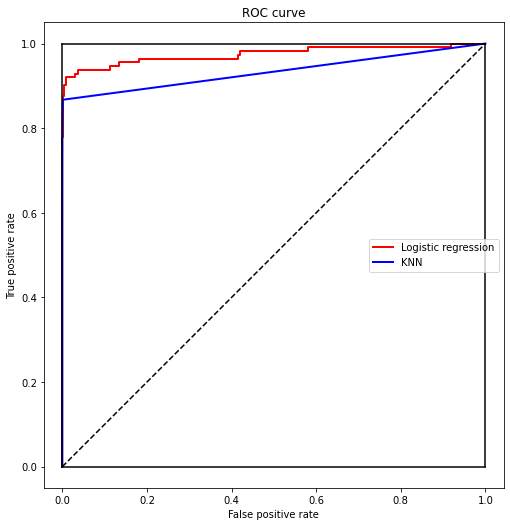

In [98]:
#ROC-curve
plt.figure(figsize=(7, 7))

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, logreg_pred_proba)
plt.plot(fpr_logreg, tpr_logreg, "b", linewidth=2, color="red", label="Logistic regression")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, knn_pred_proba)
plt.plot(fpr_knn, tpr_knn, "b", linewidth=2, color="blue", label="KNN")
plt.tight_layout()
plt.legend()
plt.plot([0, 1], [0, 1], "k--")
plt.plot([0, 0], [0, 1], "k")
plt.plot([1, 1], [0, 1], "k")
plt.plot([0, 1], [0, 0], "k")
plt.plot([0, 1], [1, 1], "k")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis("equal")
plt.title("ROC curve")
plt.show()

In [154]:
#auc
print(f"AUC для KNN: {roc_auc_score(Y_test, knn_pred_proba)}")
print(f"AUC для логистической регрессии: {roc_auc_score(Y_test, logreg_pred_proba)}")

AUC для KNN: 0.9334594538542427
AUC для логистической регрессии: 0.9745163018263159


ROC кривая для KNN хуже, AUC для KNN ниже, в отличие от других метрик.

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Accuracy не подходит из-за несбалансированности датасета. Изходя из постановки задачи, кажется, что наиболее важно забанить всех мошенников, случаи случайного бана честных пользователей можно рассматривать в личном порядке вручную после жалобы пользователя, а при пропуске мошенника он так и останется безнаказанным. Для этих целей наиболее всех подходит recall (число определенных мошенников среди их общего числа).

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Оценим исходную модель через кросс-валидацию и попробуем убрать время.

In [123]:
from sklearn.model_selection import cross_val_score
score_base = cross_val_score(LogisticRegression(), X_train, Y_train, cv=5, scoring="recall")
print(f"Recall на исходном датасете: {np.mean(score_base)}")

X_mod_train = X_train[: , 1:]
X_mod_test = X_test[: , 1:]
score_mod = cross_val_score(LogisticRegression(), X_mod_train, Y_train, cv=5, scoring="recall")
print(f"Recall на датасете без Time: {np.mean(score_mod)}")

Recall на исходном датасете: 0.6306666666666667
Recall на датасете без Time: 0.6306666666666667


Время никак не влияет на recall, его можно убрать для экономии ресурсов. Переберем веса для классов, так как задача сформулирована так, что необходимо максимизировать предказание мошенников при их недопредставленности, будем увеличивать вес класса 1. Также посмотрим на precision, чтобы он не падал драмматически.

In [126]:
#На интервале от 1 до 10
recalls = []
precisions = []
for weight in [*range(1, 11)]:
    recall = cross_val_score(LogisticRegression(class_weight={0: 1, 1:weight}), X_mod_train, Y_train, cv=5, scoring="recall")
    precision = cross_val_score(LogisticRegression(class_weight={0: 1, 1:weight}), X_mod_train, Y_train, cv=5, scoring="precision")
    precisions.append(precision)
    recalls.append(recall)

In [132]:
recalls = list(map(lambda x: np.mean(x), recalls))
precisions = list(map(lambda x: np.mean(x), precisions))

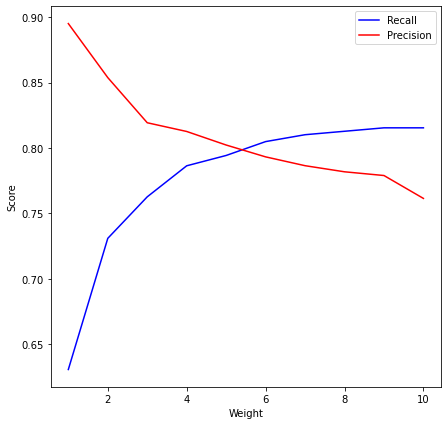

In [133]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(np.arange(1, 11), recalls, color="blue", label="Recall")
ax.plot(np.arange(1, 11), precisions, color="red", label="Precision")
plt.legend()
plt.xlabel("Weight")
plt.ylabel("Score")
plt.show()

In [134]:
#На интервале от 10 до 100
recalls = []
precisions = []
for weight in [*range(10, 110, 10)]:
    recall = np.mean(cross_val_score(LogisticRegression(class_weight={0: 1, 1:weight}), X_mod_train, Y_train, cv=5, scoring="recall"))
    precision = np.mean(cross_val_score(LogisticRegression(class_weight={0: 1, 1:weight}), X_mod_train, Y_train, cv=5, scoring="precision"))
    precisions.append(precision)
    recalls.append(recall)

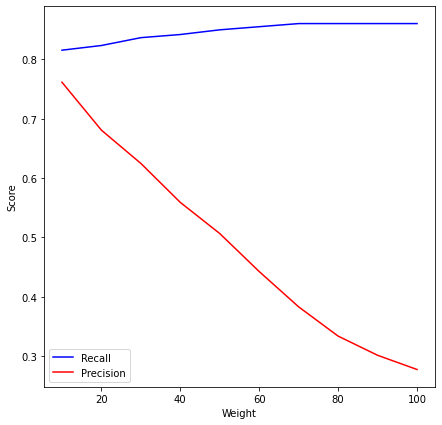

In [135]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(np.arange(10, 110, 10), recalls, color="blue", label="Recall")
ax.plot(np.arange(10, 110, 10), precisions, color="red", label="Precision")
plt.legend()
plt.xlabel("Weight")
plt.ylabel("Score")
plt.show()

Видно, что после веса 9 recall выходит на плато и растет медленно, а precision падает сильно. Остановимся на весах 1 к 9. Теперь подберем параметр регуляризации.

In [ ]:
recalls = []
for lambda_ in np.arange(0, 10, 0.5):
    recall = np.mean(cross_val_score(LogisticRegression(C=lambda_, class_weight={0: 1, 1:9}), X_mod_train, Y_train, cv=5, scoring="recall"))
    recalls.append(recall)

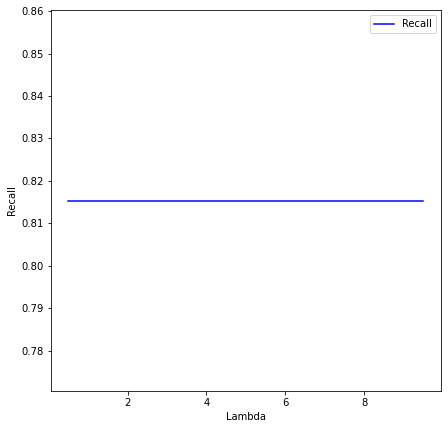

In [139]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(np.arange(0, 10, 0.5), recalls, color="blue", label="Recall")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Recall")
plt.show()

In [148]:
recalls

[nan,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316,
 0.8153684210526316]

In [147]:
score_none =  np.mean(cross_val_score(LogisticRegression(penalty="none", class_weight={0: 1, 1:9}), X_mod_train, Y_train, cv=5, scoring="recall"))
print(f"Recall без регуляризации: {score_none}")

Recall без регуляризации: 0.8153684210526316


Кажется, recall никак не зависит от параметра L2 регуляризации, оставим параметры по-умолчанию

In [149]:
logreg = LogisticRegression(class_weight={0: 1, 1:9})
logreg.fit(X_mod_train, Y_train)
logreg_pred_final = logreg.predict(X_mod_test)
logreg_pred_proba_final = logreg.predict_proba(X_mod_test)[:, 1]

In [150]:
knn = KNeighborsClassifier()
knn.fit(X_mod_train, Y_train)
knn_pred = knn.predict(X_mod_test)

In [151]:
print(f"Recall для исходной регрессии: {recall_score(Y_test, logreg_pred)}")
print(f"Recall для KNN: {recall_score(Y_test, knn_pred)}")
print(f"Recall для итоговой регрессии: {recall_score(Y_test, logreg_pred_final)}")

Recall для исходной регрессии: 0.6017699115044248
Recall для KNN: 0.7787610619469026
Recall для итоговой регрессии: 0.8230088495575221


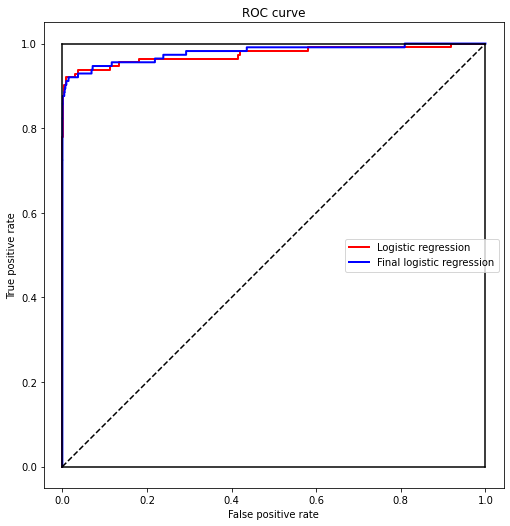

In [152]:
#ROC-curve
plt.figure(figsize=(7, 7))

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, logreg_pred_proba)
plt.plot(fpr_logreg, tpr_logreg, "b", linewidth=2, color="red", label="Logistic regression")

fpr_logreg_f, tpr_logreg_f, thresholds_logreg_f = roc_curve(Y_test, logreg_pred_proba_final)
plt.plot(fpr_logreg_f, tpr_logreg_f, "b", linewidth=2, color="blue", label="Final logistic regression")
plt.tight_layout()
plt.legend()
plt.plot([0, 1], [0, 1], "k--")
plt.plot([0, 0], [0, 1], "k")
plt.plot([1, 1], [0, 1], "k")
plt.plot([0, 1], [0, 0], "k")
plt.plot([0, 1], [1, 1], "k")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis("equal")
plt.title("ROC curve")
plt.show()

In [153]:
print(f"AUC для логистической регрессии: {roc_auc_score(Y_test, logreg_pred_proba)}")
print(f"AUC для итоговой логистической регрессии: {roc_auc_score(Y_test, logreg_pred_proba_final)}")

AUC для логистической регрессии: 0.9745163018263159
AUC для итоговой логистической регрессии: 0.9792242231070936


В итоге recall удалось повысить, также исхоя из этой метрики модель стала показывать себя лучше, чем KNN, вместе с этим ROC кривая стала лучше, и метрика AUC немного подросла.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Был взят датасет WeatherHistory с историей наблюдений за погодой. Попробуем научиться предсказывать тип погоды по ряду характеристик. [Ссылка на Kaggle](https://www.kaggle.com/datasets/muthuj7/weather-dataset)

In [92]:
weather = pd.read_csv("weatherHistory.csv")

In [93]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Удалим лишние колонки.

In [94]:
weather = weather.drop(columns=["Formatted Date", "Daily Summary"])

In [95]:
weather.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [96]:
weather = weather[(weather.Summary == "Partly Cloudy") |
                 (weather.Summary == "Mostly Cloudy") |
                 (weather.Summary == "Overcast") |
                 (weather.Summary == "Clear") |
                 (weather.Summary == "Foggy") |
                 (weather.Summary == "Breezy and Overcast") |
                 (weather.Summary == "Breezy and Mostly Cloudy") |
                 (weather.Summary == "Breezy and Partly Cloudy")
                 ]

Для простоты оставим только 8 наиболее многочисленых класса.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [98]:
Y = weather.Summary
X = weather.drop(columns=["Summary"])
X = pd.get_dummies(X)

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
w_scaler = StandardScaler()
w_scaler.fit(X_train)
X_train_scaled = w_scaler.transform(X_train)
X_test_scaled = w_scaler.transform(X_test)

Брать константу кажется бессмысленным, так как отсутсвует явно преобладающий класс.

In [100]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, Y_train)
logreg_pred = logreg.predict(X_test_scaled)

In [101]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)
knn_pred = knn.predict(X_test_scaled)

In [102]:
#accuracy
accuracy_knn = accuracy_score(Y_test, knn_pred)
accuracy_lr = accuracy_score(Y_test, logreg_pred)
print(f"Accuracy для KNN: {accuracy_knn}")
print(f"Accuracy для логистической регрессии: {accuracy_lr}")

Accuracy для KNN: 0.4918032786885246
Accuracy для логистической регрессии: 0.49810203145205023


In [103]:
#precision
precision_knn = precision_score(Y_test, knn_pred, average="macro")
precision_lr = precision_score(Y_test, logreg_pred, average="macro")
print(f"Precision для KNN: {precision_knn}")
print(f"Precision для логистической регрессии: {precision_lr}")

Precision для KNN: 0.5221768484592912
Precision для логистической регрессии: 0.537022734647876


In [104]:
#recall
# print(f"Recall для константы: {recall_score(Y_test, const_pred)}")
recall_knn = recall_score(Y_test, knn_pred, average="macro")
recall_lr = recall_score(Y_test, logreg_pred, average="macro")
print(f"Recall для KNN: {recall_knn}")
print(f"Recall для логистической регрессии: {recall_lr}")

Recall для KNN: 0.5181499238819409
Recall для логистической регрессии: 0.5040179921117044


In [105]:
#f1
f1_knn = f1_score(Y_test, knn_pred, average="macro")
f1_lr = f1_score(Y_test, logreg_pred, average="macro")
print(f"F1 для KNN: {f1_knn}")
print(f"F1 для логистической регрессии: {f1_lr}")

F1 для KNN: 0.5189404355865795
F1 для логистической регрессии: 0.49712893538990327


In [106]:
#precision weighted
precision_knn = precision_score(Y_test, knn_pred, average="weighted")
precision_lr = precision_score(Y_test, logreg_pred, average="weighted")
print(f"Precision для KNN: {precision_knn}")
print(f"Precision для логистической регрессии: {precision_lr}")

Precision для KNN: 0.4955322729375557
Precision для логистической регрессии: 0.49581493265569415


In [107]:
#recall weighted
recall_knn = recall_score(Y_test, knn_pred, average="weighted")
recall_lr = recall_score(Y_test, logreg_pred, average="weighted")
print(f"Recall для KNN: {recall_knn}")
print(f"Recall для логистической регрессии: {recall_lr}")

Recall для KNN: 0.4918032786885246
Recall для логистической регрессии: 0.49810203145205023


In [108]:
#f1 weighted
f1_knn = f1_score(Y_test, knn_pred, average="weighted")
f1_lr = f1_score(Y_test, logreg_pred, average="weighted")
print(f"F1 для KNN: {f1_knn}")
print(f"F1 для логистической регрессии: {f1_lr}")

F1 для KNN: 0.4923037935985157
F1 для логистической регрессии: 0.4737213770837105


Одни метрики выше для регресси, другие для KNN, в целом, они все достаточно низкие.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Так как в данном случае не стоит задачи с необходимостью максимально найти какой-то один класс или, наоборот, выбрать его элементы с макисмальной уверенность, можно остановиться на f1 мере с усреднением "weighted" в связи с несбалансированностью датасета.

In [111]:
#Оценим исходную модель на исходных данных через кросс-валидацию
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LogisticRegression(max_iter=1000), X_train_scaled, Y_train, cv=5, scoring="f1_weighted"))

0.47535222538881783

Переберем возможные алгоритмы решений

In [138]:
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
for solver in solvers:
    score = np.mean(cross_val_score(LogisticRegression(max_iter=1000, solver=solver),
                            X_train_scaled, Y_train, cv=5, scoring="f1_weighted"))
    print(f"{solver}: {score}")

newton-cg: 0.4753646202807739
lbfgs: 0.47535222538881783
liblinear: 0.46018397544099143
sag: 0.47536830186063483
saga: 0.475352782917593


Ни один не показал себя лучше дефолтного, изменим на "saga" для возможности выбора других вариантов регуляризации кроме "L2". Посмотрим на параметры регуляризации

In [140]:
f1s_l2 = []
for lambda_ in np.arange(0.5, 5.5, 0.5):
    f1 = np.mean(cross_val_score(LogisticRegression(max_iter=1000, solver="saga", penalty="l2", C=lambda_),
                                 X_train_scaled, Y_train, cv=5, scoring="f1_weighted"))
    f1s_l2.append(f1)

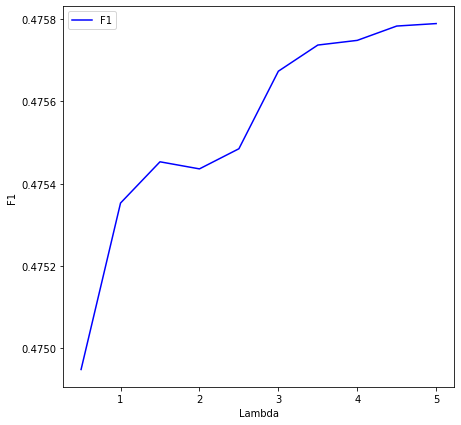

In [141]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(np.arange(0.5, 5.5, 0.5), f1s_l2, color="blue", label="F1")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("F1")
plt.show()

In [ ]:
f1s_l1 = []
for lambda_ in np.arange(0.5, 5.5, 0.5):
    f1 = np.mean(cross_val_score(LogisticRegression(max_iter=1000, solver="saga", penalty="l1", C=lambda_), 
                                 X_train_scaled, Y_train, cv=5, scoring="f1_weighted"))
    f1s_l1.append(f1)

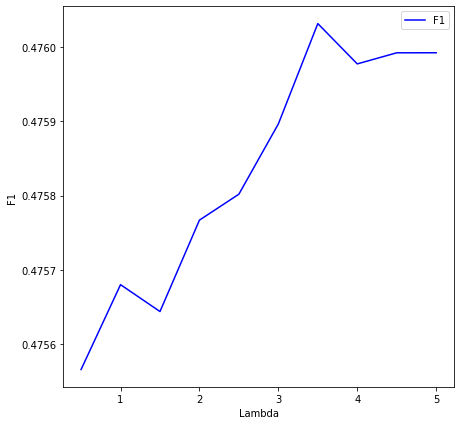

In [143]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(np.arange(0.5, 5.5, 0.5), f1s_l1, color="blue", label="F1")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("F1")
plt.show()

Наиболее хороший результат на рассмотренном отрезке показала l1 регуляризация с параметром 3.5, однако при установленном максимальном количестве итераций, алгоритм не сошелся, увеличим max_iter до 2000.

In [147]:
np.mean(cross_val_score(LogisticRegression(max_iter=2000, solver="saga", penalty="l1", C=3.5), 
                                 X_train_scaled, Y_train, cv=5, scoring="f1_weighted"))

0.476031322158948

Попробуем сбалансировать классы.

In [149]:
np.mean(cross_val_score(LogisticRegression(max_iter=2000, class_weight="balanced", solver="saga", penalty="l1", C=3.5), 
                                 X_train_scaled, Y_train, cv=5, scoring="f1_weighted"))

/home/dmitry/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/dmitry/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/dmitry/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/dmitry/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/dmitry/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarn

0.4318049460734662

Алгоритм не сошелся и стало хуже. Удалим из датасета колонку с константным значением. Попробуем добаваить колонку с разницей между ощущаемой и реальной температурами.

In [155]:
set(X["Loud Cover"])

{0.0}

In [158]:
X_train = X_train.drop(columns=["Loud Cover"])
X_test = X_test.drop(columns=["Loud Cover"])
X_train["Temperature difference"] = X_train["Apparent Temperature (C)"] - X_train["Temperature (C)"]
X_test["Temperature difference"] = X_test["Apparent Temperature (C)"] - X_test["Temperature (C)"]
w_scaler = StandardScaler()
w_scaler.fit(X_train)
X_train_scaled = w_scaler.transform(X_train)
X_test_scaled = w_scaler.transform(X_test)

In [160]:
np.mean(cross_val_score(LogisticRegression(max_iter=2000, solver="saga", penalty="l1", C=3.5), 
                                 X_train_scaled, Y_train, cv=5, scoring="f1_weighted"))

0.47592779297965493

Результат значимо не изменился, проведем финальную валидацию на тестовой выборке.

In [162]:
final_logreg = LogisticRegression(max_iter=2000, solver="saga", penalty="l1", C=3.5)
final_logreg.fit(X_train_scaled, Y_train)
final_pred = final_logreg.predict(X_test_scaled)
f1_base = f1_score(Y_test, logreg_pred, average="weighted")
f1_final = f1_score(Y_test, final_pred, average="weighted")
print(f"F1 для изначальной модели: {f1_base}")
print(f"F1 для финальной модели: {f1_final}")

F1 для изначальной модели: 0.4737213770837105
F1 для финальной модели: 0.4741109569501865


Значительно повысить качество предсказания, выраженного F1 мерой не получилось. Метрика по-прежнему довольно посредственная(.